In [1]:
import snap
import json
import collections
import matplotlib.pyplot as plt
import pickle
import numpy as np
# import networkx as nx

In [2]:
business_path = '../yelp_dataset/yelp_academic_dataset_business.json'
user_path = '/home/yilong/yelp_dataset/yelp_academic_dataset_user.json'
review_path = '../yelp_dataset/yelp_academic_dataset_review.json'
tip_path = '../yelp_dataset/yelp_academic_dataset_tip.json'
review_small_path = '../yelp_dataset/review_small.json'
user_small_path = '/home/yilong/yelp_dataset/user_small.json'
business_small_path = '../yelp_dataset/business_small.json'
tip_small_path = '../yelp_dataset/tip_small.json'

In [3]:
def find_users(path):
    print 'begin parsing users...'
    users = collections.defaultdict() # uid: (elite, friends)
    elite_users = set()
    
    with open(path) as json_file:
        for line in json_file:
            raw = json.loads(line)
            if raw['elite'] != 'None':
                elite = raw['elite'].split(', ')
                elite_users.add(raw['user_id'])
            else:
                elite = []

            users[raw['user_id']] = (elite, raw['average_stars'], raw['review_count'])

    print 'done.'
    return users, elite_users

In [4]:
def find_friends(path):
    print 'begin parsing users...'
    user_friends = collections.defaultdict(list) # {uid : [friends]}
    with open(path) as json_file:
        for line in json_file:
            raw = json.loads(line)
            if raw['friends'] != 'None':
                user_friends[raw['user_id']] = raw['friends'].split(', ')
    print 'done.'
    return user_friends

In [6]:
def construct_user_graph(users, elite_users, user_friends):
    print "# of users, # of elite users, # of users that has friends = %d, %d, %d" %(len(users),len(elite_users),len(user_friends))

    G = snap.TUNGraph.New()
    uid2node = {}
    
    print "Adding users..."
    for uid in users:
        uid2node[uid] =  G.AddNode(-1)
    print "Adding friends..."
    for uid in user_friends:
        for friend in user_friends[uid]:
#             if friend not in users:
#                 uid2node[friend] =  G.AddNode(-1)
#             G.AddEdge(uid2node[uid], uid2node[friend])
            if friend in users:
                G.AddEdge(uid2node[uid], uid2node[friend])

    print "# Nodes = %d" %G.GetNodes()
    print "# Edges = %d" %G.GetEdges()
    return G, uid2node

In [12]:
# users, elite_users = find_users(user_small_path)
# with open('users_small.pkl', 'wb') as f:
#     pickle.dump(users, f)
# with open('elite_users_small.pkl', 'wb') as f:
#     pickle.dump(elite_users, f)

# user_friends = find_friends(user_small_path)
# with open('user_friends_small.pkl', 'wb') as f:
#     pickle.dump(user_friends, f)

In [23]:
# users, elite_users = find_users(user_path)
# with open('users.pkl', 'wb') as f:
#     pickle.dump(users, f)
# with open('elite_users.pkl', 'wb') as f:
#     pickle.dump(elite_users, f)

In [7]:
with open('users.pkl', 'rb') as f:
    users = pickle.load(f)
with open('elite_users.pkl', 'rb') as f:
    elite_users = pickle.load(f)
    
with open('user_friends.pkl', 'rb') as f:
    user_friends = pickle.load(f)
# print elite_users
# print users['B3xwUPXMlCb7_5IEDlq4Uw'][1]
# print user_friends["B3xwUPXMlCb7_5IEDlq4Uw"]

In [15]:
G, uid2node = construct_user_graph(users, elite_users, user_friends)
elite_ids = [uid2node[i] for i in elite_users]

# of users, # of elite users, # of users that has friends = 1518169, 67109, 879891
Adding users...
Adding friends...
# Nodes = 1518169
# Edges = 6619057


In [ ]:
# def plot_user_graph(G, elite_ids):    
# #     NIdColorH = snap.TIntStrH()
# #     for node in G.Nodes():
# #         idx = node.GetId()
# #         NIdColorH[idx] = 'green'
# #     for eid in elite_ids:
# #         NIdColorH[eid] = 'red'

# #     snap.DrawGViz(G, snap.gvlDot, 'user-user/All-users.png', "User-User", False, NIdColorH)
#     Gnx = nx.Graph()
#     print "adding nodes..."
#     for node in G.Nodes():
#         nodeId = node.GetId()
#         Gnx.add_node(nodeId)
#     print "adding edges..."
#     for EI in G.Edges(): # Edge traversal
#         Gnx.add_edge(EI.GetSrcNId(), EI.GetDstNId())
#     print "# Gnx Nodes = %d" %Gnx.number_of_nodes()
#     print "# Gnx Edges = %d" %Gnx.number_of_edges()
    
#     plt.Figure()
#     nx.draw(Gnx, with_labels=False, font_weight='bold')
#     plt.savefig('user-user/All_users_nx.png')
#     plt.show()
    
# plot_user_graph(G, elite_ids)

In [ ]:
def plot_ego_graph(G, elite_ids):
    for ite in range(20):
        eid = np.random.choice(elite_ids)
        print eid
        node = G.GetNI(eid)
        deg = node.GetDeg()
        
        NIdV = snap.TIntV()
        NIdV.Add(eid)
        nbrs = []
        for i in range(deg):
            nbr = node.GetNbrNId(i)
            nbrs.append(nbr)
            NIdV.Add(nbr)
        egoNet = snap.GetSubGraph(G, NIdV)
#         NodeVec1 = snap.TIntV()
#         snap.GetNodesAtHop(G, eid, 1, NodeVec1, False)
#         NodeVec2 = snap.TIntV()
#         snap.GetNodesAtHop(G, eid, 2, NodeVec2, False)
#         for i in range(0, NodeVec1.Len()):
#             NodeVec2.Add(NodeVec1[i])                
#         egoNet = snap.GetSubGraph(G, NodeVec2)    
        NIdColorH = snap.TIntStrH()
        for node in egoNet.Nodes():
            idx = node.GetId()
            if idx in elite_ids:
                NIdColorH[idx] = 'red'
            else:
                NIdColorH[idx] = 'blue'
        NIdColorH[eid] = 'purple'
        snap.DrawGViz(egoNet, snap.gvlDot, 'elite_user_ego/Elite-user-ego_'+ str(ite)+ '.png', str(eid), False, NIdColorH)

plot_ego_graph(G, elite_ids)

done degree dist of all nodes
average degree of all users = 8.719789
average degree of elite users = 77.259250


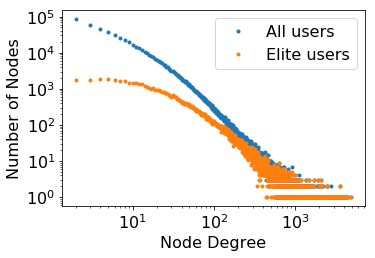

In [35]:
def plot_degree_dist(G, elite_ids):

    DegToCntV = snap.TIntPrV()
    snap.GetDegCnt(G, DegToCntV)
    deg = []
    count = []
    for item in DegToCntV:
        deg.append(item.GetVal1())
        count.append(item.GetVal2())
    print "done degree dist of all nodes"
    ave_deg = sum([deg[i]*count[i] for i in range(len(deg))]) * 1.0 / sum(count)
    print 'average degree of all users = %f'  %ave_deg
    
    deg_elite, count_elite = [], []
    degree_elite = collections.defaultdict(int)
    for elite in elite_ids:
        node = G.GetNI(elite) 
        d = node.GetDeg()
        degree_elite[d] += 1

    for key in degree_elite:
        if key != 0:
            deg_elite.append(key)
            count_elite.append(degree_elite[key])
    ave_deg_elite = sum([deg_elite[i]*count_elite[i] for i in range(len(deg_elite))]) * 1.0 / len(elite_ids)
    print 'average degree of elite users = %f'  %ave_deg_elite
            
    plt.plot(deg[2:], count[2:],'.', deg_elite[1:],count_elite[1:], '.')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Node Degree',fontsize=16)
    plt.ylabel('Number of Nodes',fontsize=16)
#     plt.title('Degree Distribution')
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.legend(["All users", "Elite users"],fontsize=16)
    plt.subplots_adjust(left=0.2,bottom = 0.2)
    plt.savefig('user-user/Degree_dist_elite.png')
    plt.show()
    
plot_degree_dist(G, elite_ids)

Calculating clustering coefficient...
Done calculating clustering coefficient...
average clustering coefficient of all users = 0.043183
average clustering coefficient of elite users = 0.171807


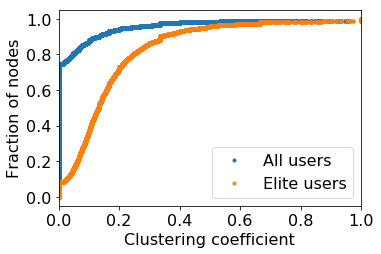

In [34]:
def plot_clustering_coeff(G, elite_ids):
    print "Calculating clustering coefficient..."
    NIdCCfH = snap.TIntFltH()
    snap.GetNodeClustCf(G, NIdCCfH)
    cluster_c = []
    cluster_c_elite = []
    
    for item in NIdCCfH:
        cluster_c.append(NIdCCfH[item])
    print "Done calculating clustering coefficient..."
    ave_cc = 1.0* sum(cluster_c)/len(cluster_c)
    print 'average clustering coefficient of all users = %f'  %ave_cc
    
    for elite in elite_ids:
        cluster_c_elite.append(NIdCCfH[elite])
    ave_cc_elite = 1.0* sum(cluster_c_elite)/len(cluster_c_elite)
    print 'average clustering coefficient of elite users = %f'  %ave_cc_elite
    
    cluster_c.sort()
    cluster_c_elite.sort()
    fraction = np.array(range(1,len(cluster_c)+1))/(len(cluster_c)+1.0)
    fraction_elite = np.array(range(1,len(cluster_c_elite)+1))/(len(cluster_c_elite)+1.0)
    
    plt.figure()
    plt.plot(cluster_c, fraction,'.', cluster_c_elite, fraction_elite,'.')
    
    plt.xlim([0.01,1])
    plt.xticks(np.arange(0, 1.2, 0.2))
    
    plt.xlabel('Clustering coefficient',fontsize=16)
    plt.ylabel('Fraction of nodes',fontsize=16)
    plt.legend(["All users", "Elite users"],fontsize=16)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.subplots_adjust(left=0.2,bottom = 0.2)
    plt.savefig('user-user/Clustering_coeff_elite.png')
    plt.show()
    
plot_clustering_coeff(G, elite_ids)

Calculating clustering coefficient...
Done calculating clustering coefficient...
average clustering coefficient of all users = 0.043183
average clustering coefficient of elite users = 0.171807


/yagami/lyl/hw2-bundle/env/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/yagami/lyl/hw2-bundle/env/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


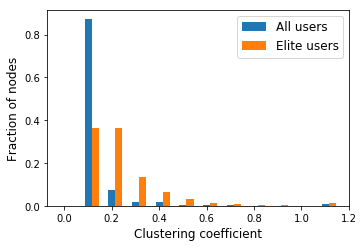

In [33]:
def plot_clustering_coeff_hist(G, elite_ids):
    print "Calculating clustering coefficient..."
    NIdCCfH = snap.TIntFltH()
    snap.GetNodeClustCf(G, NIdCCfH)
    cluster_c = []
    cluster_c_elite = []
    
    for item in NIdCCfH:
        cluster_c.append(NIdCCfH[item])
    print "Done calculating clustering coefficient..."
    ave_cc = 1.0* sum(cluster_c)/len(cluster_c)
    print 'average clustering coefficient of all users = %f'  %ave_cc
    
    for elite in elite_ids:
        cluster_c_elite.append(NIdCCfH[elite])
    ave_cc_elite = 1.0* sum(cluster_c_elite)/len(cluster_c_elite)
    print 'average clustering coefficient of elite users = %f'  %ave_cc_elite
    
    cc, bins = np.histogram(cluster_c, bins = np.arange(-0.1, 1.1, 0.1), normed=1, density = 1)
    density_cc = cc/cc.sum()
    
    cc_elite, bins_elite = np.histogram(cluster_c_elite, bins = np.arange(-0.1, 1.1, 0.1), normed=1, density = 1)
    density_cc_elite = cc_elite/cc_elite.sum()
    
    plt.figure()
    plt.bar(bins[1:],density_cc,width = 0.03)
    plt.bar(bins_elite[1:]+0.03,density_cc_elite,width = 0.03)
    
#     plt.xlim([0.01,1])
#     plt.xticks(np.arange(0, 1.2, 0.2))
    
    plt.xlabel('Clustering coefficient',fontsize=12)
    plt.ylabel('Fraction of nodes',fontsize=12)
    plt.legend(["All users", "Elite users"],fontsize=12)
    plt.subplots_adjust(left=0.2,bottom = 0.2)
    plt.savefig('user-user/Clustering_coeff_elite_hist.png')
    plt.show()
    
plot_clustering_coeff_hist(G, elite_ids)

/yagami/lyl/hw2-bundle/env/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  app.launch_new_instance()
/yagami/lyl/hw2-bundle/env/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


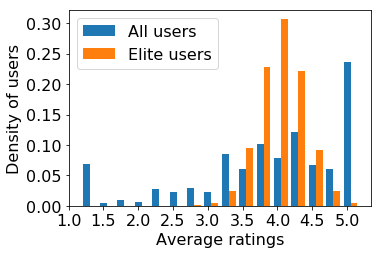

In [32]:
def plot_review_count(users, elite_users):
    score = []
    count = []
    for i in users:
        score.append(users[i][1])
        count.append(users[i][2])
    
    score_elite = []
    count_elite = []
    
    for i in elite_users:

        score_elite.append(users[i][1])
        count_elite.append(users[i][2])
    
    density_score, bins = np.histogram(score, bins = np.arange(1, 5.2, 0.25), normed=1, density = 1)
    density_score = density_score/density_score.sum()
    
    density_score_elite, bins_elite = np.histogram(score_elite, bins = np.arange(1, 5.2, 0.25), normed=1, density = 1)
    density_score_elite = density_score_elite/density_score_elite.sum()
    
    plt.figure()
    plt.bar(bins[1:],density_score,width = 0.1)
    plt.bar(bins_elite[1:]+0.1,density_score_elite,width = 0.1)
    plt.xlabel('Average ratings',fontsize=16)
    plt.ylabel('Density of users',fontsize=16)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.subplots_adjust(left=0.2,bottom = 0.2)
    plt.legend(["All users", "Elite users"],fontsize=16)
    plt.savefig('user-user/score.png')
    plt.show()

plot_review_count(users, elite_users)

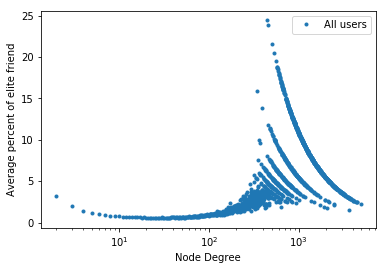

In [14]:
def plot_elite_percent(G, elite_ids):

#     DegToCntV = snap.TIntPrV()
#     snap.GetDegCnt(G, DegToCntV)
#     deg = []
#     count = []
#     for item in DegToCntV:
#         deg.append(item.GetVal1())
#         count.append(item.GetVal2())
#     print "done degree dist of all nodes"
    
    deg_elite, percent_elite_friend = [], []
    degree_elite = collections.defaultdict(int)
    elite_friend = collections.defaultdict(int)
    for elite in elite_ids:
        node = G.GetNI(elite) 
        d = node.GetDeg()
        degree_elite[d] += 1
        for i in range(d):
            nbr = node.GetNbrNId(i)
            if nbr in elite_ids:
                elite_friend[d] += 1

    for key in degree_elite:
        if key != 0:
            percent = 1.0 * elite_friend[d] / (key * degree_elite[key])
            deg_elite.append(key)
            
            percent_elite_friend.append(percent)
            
    plt.plot(deg_elite[1:],percent_elite_friend[1:], '.')
    plt.xscale('log')
#     plt.yscale('log')
    plt.xlabel('Node Degree')
    plt.ylabel('Average percent of elite friend')
#     plt.title('Degree Distribution')
    plt.legend(["All users", "Elite users"])
    
    plt.savefig('user-user/Percent_elite.png')
    plt.show()
    
plot_elite_percent(G, elite_ids)

In [10]:
FOut = snap.TFOut("All_users_2.graph")
G.Save(FOut)
FOut.Flush()

In [2]:
FIn = snap.TFIn("All_users_2.graph")
G = snap.TUNGraph.Load(FIn)